In [98]:
import csv
import pandas as pd
import itertools
import math
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
import string
import re
import nltk
from google.colab import files
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import classification_report, plot_confusion_matrix




In [99]:
uploaded = files.upload()

news = pd.read_csv('rnews.csv')

Saving rnews.csv to rnews (1).csv


In [100]:
news.head()

,id,title,score,subreddit,url,num_comments,text,created,police_brutality
0,dfn3yi,Blizzard Employees Staged a Walkout After the ...,226329,news,https://www.thedailybeast.com/blizzard-employe...,9621,"Blizzard makes a lot of money in China, but no...",1.570683e+09,0
1,eubjfc,Kobe Bryant killed in helicopter crash in Cali...,213687,news,https://www.fox5dc.com/news/kobe-bryant-killed...,20700,Kobe Bryant was one of 9 people who was killed...,1.580096e+09,0
2,84aebi,Scientist Stephen Hawking has died aged 76,188181,news,http://news.sky.com/story/scientist-stephen-ha...,6916,"By Tom Gillespie, News Reporter Wednesday 14 M...",1.521028e+09,0
3,dp5lr1,Jeffrey Epstein's autopsy more consistent with...,186249,news,https://www.foxnews.com/us/forensic-pathologis...,10056,"This material may not be published, broadcast,...",1.572465e+09,0
4,7ej943,F.C.C. Announces Plan to Repeal Net Neutrality,178003,news,https://www.nytimes.com/2017/11/21/technology/...,10856,Advertisement Supported by By Cecilia Kang The...,1.511312e+09,0


In [101]:
news=news.drop(['id', 'score','subreddit', 'url','num_comments','title','created'], axis=1)

In [102]:
news.head()

,text,police_brutality
0,"Blizzard makes a lot of money in China, but no...",0
1,Kobe Bryant was one of 9 people who was killed...,0
2,"By Tom Gillespie, News Reporter Wednesday 14 M...",0
3,"This material may not be published, broadcast,...",0
4,Advertisement Supported by By Cecilia Kang The...,0


In [103]:
uploaded = files.upload()
police_use_force = pd.read_csv('police_use_force_two.csv')

Saving police_use_force_two.csv to police_use_force_two (1).csv


In [104]:
police_use_force.head()

,links,state,city,tags,name,date,date_text,police_brutality,text
0,['https://twitter.com/perfectlyg0lden/status/1...,Unknown Location,NaN,"['horse', 'drive', 'pepper-spray', 'protester']",Compilation of incidents,2020-05-31,May 31st,1,Police officers are seen pushing around and ev...
1,['https://www.facebook.com/story.php?story_fbi...,Vermont,St. Johnsbury,"['shove', 'arrest', 'push', 'protester']",Police shove a protesting woman down a set of ...,2020-06-03,June 3rd,1,Police shove a protesting woman down a set of ...
2,['https://twitter.com/misaacstein/status/12683...,Louisiana,New Orleans,"['tear-gas', 'tear-gas-canister', 'protester']",Police throw tear-gas at protesters on a bridge.,2020-06-03,June 3rd,1,Police throw tear-gas at protesters that are o...
3,"['https://gfycat.com/tautimaginativedore', 'ht...",Texas,Austin,"['choke', 'threaten', 'gun', 'beat', 'punch', ...",Police assault protesters,2020-05-30,May 30th,1,A group of protesters waving signs in front of...
4,['https://www.reddit.com/r/PublicFreakout/comm...,Texas,Austin,"['child', 'shoot', 'rubber-bullet', 'bean-bag'...",Police shoot non-violent protester in the head,2020-05-30,May 30th,1,"Here, a non-violent protester can be seen stan..."


In [105]:
police_use_force=police_use_force.drop(['links','state', 'city','tags','date','text', 'date_text', 'name'], axis=1)

In [106]:
frames = [news, police_use_force]

In [107]:
df=pd.concat(frames)

In [108]:
df.shape

(1950, 2)

In [109]:
df.head()

,text,police_brutality
0,"Blizzard makes a lot of money in China, but no...",0
1,Kobe Bryant was one of 9 people who was killed...,0
2,"By Tom Gillespie, News Reporter Wednesday 14 M...",0
3,"This material may not be published, broadcast,...",0
4,Advertisement Supported by By Cecilia Kang The...,0


In [110]:
df['content']=df['text']

In [111]:
df=df.drop(['text'], axis=1)

In [112]:
df['content']=df['content'].astype(str)

In [113]:
df.head()

,police_brutality,content
0,0,"Blizzard makes a lot of money in China, but no..."
1,0,Kobe Bryant was one of 9 people who was killed...
2,0,"By Tom Gillespie, News Reporter Wednesday 14 M..."
3,0,"This material may not be published, broadcast,..."
4,0,Advertisement Supported by By Cecilia Kang The...


In [114]:
nlp = spacy.load("en")

In [115]:
def tokenize(text):
    text = nlp(text)
    tokens = [token.lemma_ for token in text if (token.is_stop != True) and (token.is_punct != True) and (token.text != " ")]
    return tokens

def retoken(text):   
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    tokens = str(tokens)
    
    return tokens

In [116]:
%time
df['tokens'] = df['content'].apply(tokenize)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [117]:
df['tokens'] = df['content'].apply(retoken)

In [118]:
df.head()

,police_brutality,content,tokens
0,0,"Blizzard makes a lot of money in China, but no...","['blizzard', 'makes', 'a', 'lot', 'of', 'money..."
1,0,Kobe Bryant was one of 9 people who was killed...,"['kobe', 'bryant', 'was', 'one', 'of', '9', 'p..."
2,0,"By Tom Gillespie, News Reporter Wednesday 14 M...","['by', 'tom', 'gillespie', 'news', 'reporter',..."
3,0,"This material may not be published, broadcast,...","['this', 'material', 'may', 'not', 'be', 'publ..."
4,0,Advertisement Supported by By Cecilia Kang The...,"['advertisement', 'supported', 'by', 'by', 'ce..."


In [119]:
df['first_ten_tokens']=df['tokens'][:10]

In [120]:
df['first_ten_tokens']=df['first_ten_tokens'].astype(str)

In [121]:
df.head()

,police_brutality,content,tokens,first_ten_tokens
0,0,"Blizzard makes a lot of money in China, but no...","['blizzard', 'makes', 'a', 'lot', 'of', 'money...","['blizzard', 'makes', 'a', 'lot', 'of', 'money..."
1,0,Kobe Bryant was one of 9 people who was killed...,"['kobe', 'bryant', 'was', 'one', 'of', '9', 'p...","['kobe', 'bryant', 'was', 'one', 'of', '9', 'p..."
2,0,"By Tom Gillespie, News Reporter Wednesday 14 M...","['by', 'tom', 'gillespie', 'news', 'reporter',...","['by', 'tom', 'gillespie', 'news', 'reporter',..."
3,0,"This material may not be published, broadcast,...","['this', 'material', 'may', 'not', 'be', 'publ...","['this', 'material', 'may', 'not', 'be', 'publ..."
4,0,Advertisement Supported by By Cecilia Kang The...,"['advertisement', 'supported', 'by', 'by', 'ce...","['advertisement', 'supported', 'by', 'by', 'ce..."


In [122]:
vect = CountVectorizer()
vect.fit(df['tokens'])
dtm = vect.transform(df['tokens'])

In [123]:
dtm_df = pd.DataFrame(dtm.todense(), columns = vect.get_feature_names())

In [124]:
dtm_df.head()

,00,000,0005,003,0036,00s,00yox,01,011,0118,013,0139,0159,02,0200,0205,0207,0270,03,039,04,0400,0404,0430,0438,044,046,05,0508,0519,0524,0529,06,0600,0615,0616,0617,069,07,0702,...,zucker,zuckerberg,zuckerbergs,zuckerman,zukeran,zullo,zur,zurcher,zus,zuuee,zv,zv1,zv7,zvd,zvj,zvuy,zvw,zw,zwg,zwis,zwk,zwnhz,zws,zx,zxbx,zxi,zxj,zxr,zxt,zy,zyb,zyh,zyklon,zyliuo6x7e,zynga,zyo,zyq,zz,zzg,zzr8
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [133]:
X = df['content']
y = df['police_brutality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1560,)
(390,)
(1560,)
(390,)


In [134]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier()),
])

In [135]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [136]:
predictions = pipeline.predict(X_test)

In [137]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       202

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390



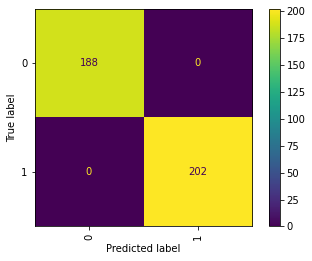

In [138]:
#Model is overtrained
cm = plot_confusion_matrix(pipeline, X_test, y_test, values_format='.0f', xticks_rotation='vertical')
cm;

In [139]:
from pickle import dump
# save the model
dump(pipeline, open('hrf_model_version_three.pkl', 'wb'))

In [140]:
from pickle import load
# load the model
loaded_model = load(open('hrf_model_version_three.pkl', 'rb'))